<a href="https://colab.research.google.com/github/manpriyad/Alt/blob/master/DataInsight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
superstore=pd.read_excel('US Superstore data.xls')

In [5]:
superstore.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


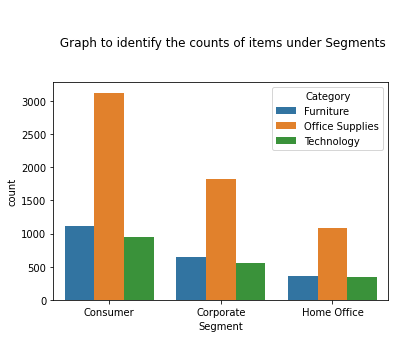

In [6]:
 plt.title('\n\n Graph to identify the counts of items under Segments\n\n')
 sns.countplot(superstore['Segment'],hue=superstore['Category'])

We noticed Office Supplies contribute to maximum count in each segment . So lets see how much profit its making

In [7]:
superstore['Profit%age']=(superstore['Profit']/superstore['Sales'])*100

In [8]:
superstore_consumer=superstore[superstore['Segment']=='Consumer']
superstore_corporater=superstore[superstore['Segment']=='Corporate']
superstore_home_office=superstore[superstore['Segment']=='Home Office']

Lets Find out most profitable Segment

In [9]:
avg_profit_segment=superstore.groupby('Segment')['Profit%age'].mean()
df_avg_profit_by_Segment=pd.DataFrame(avg_profit_segment)
df_avg_profit_by_Segment=df_avg_profit_by_Segment.reset_index()
df_avg_profit_by_Segment.columns


Index(['Segment', 'Profit%age'], dtype='object')

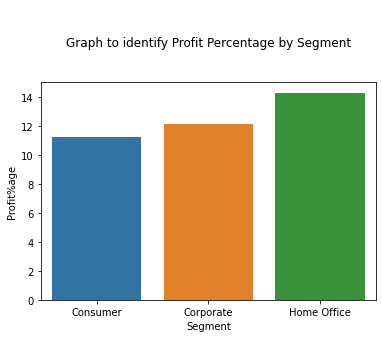

In [10]:
plt.title('\n\nGraph to identify Profit Percentage by Segment\n\n')
sns.barplot(data=df_avg_profit_by_Segment,y=df_avg_profit_by_Segment['Profit%age'],x=df_avg_profit_by_Segment['Segment'])

Lets Find out most profitable Category in most profitable segment

In [11]:
avg_profit_c_ho=superstore_home_office.groupby('Category')['Profit%age'].mean()
df_avg_profit_c_ho=pd.DataFrame(avg_profit_c_ho)
df_avg_profit_c_ho=df_avg_profit_c_ho.reset_index()
print(df_avg_profit_c_ho)

          Category  Profit%age
0        Furniture    5.211074
1  Office Supplies   16.570590
2       Technology   16.688805


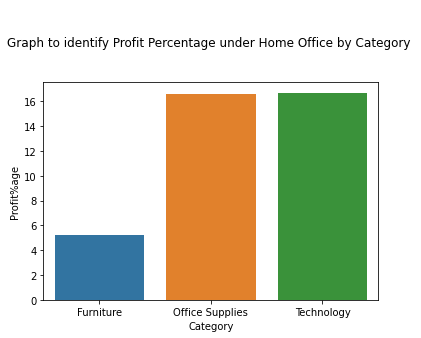

In [12]:
plt.title('\n\nGraph to identify Profit Percentage under Home Office by Category \n\n')
sns.barplot(data=df_avg_profit_c_ho,y=df_avg_profit_c_ho['Profit%age'],x=df_avg_profit_c_ho['Category'])

Lets dig further deeper from Categories to Sub-Categories

In [13]:
superstore_home_office_tech=superstore[(superstore['Segment']=='Home Office') & (superstore['Category']=='Technology')]
avg_profit_ho_tech_category=superstore_home_office_tech.groupby('Sub-Category')['Profit%age'].mean()
df_avg_profit_ho__tech_category=pd.DataFrame(avg_profit_ho_tech_category)
print(df_avg_profit_ho__tech_category)

              Profit%age
Sub-Category            
Accessories    23.178571
Copiers        38.019231
Machines        5.818323
Phones         11.051205


In [14]:
df_avg_profit_ho__tech_category=df_avg_profit_ho__tech_category.reset_index()
df_avg_profit_ho__tech_category

,Sub-Category,Profit%age
0,Accessories,23.178571
1,Copiers,38.019231
2,Machines,5.818323
3,Phones,11.051205


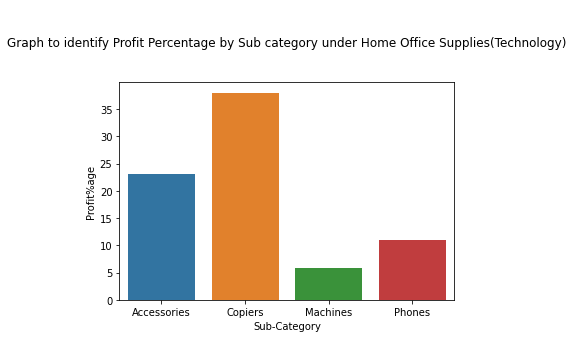

In [15]:
plt.title('\n\nGraph to identify Profit Percentage by Sub category under Home Office Supplies(Technology)\n\n')
sns.barplot(data=df_avg_profit_ho__tech_category,y=df_avg_profit_ho__tech_category['Profit%age'],x=df_avg_profit_ho__tech_category['Sub-Category'])

In [17]:
# superstore.columns
superstore_copier=superstore[superstore['Sub-Category']=='Copiers'][['Product Name','Discount','Profit%age']]
# superstore_copier['CompanyName']=superstore_copier[]


# new data frame with split value columns 
new = superstore_copier["Product Name"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
superstore_copier["Company Name"]= new[0] 
  
# making separate last name column from new data frame 
superstore_copier["Product_Name"]= new[1] 
  
# Dropping old Name columns 
superstore_copier.drop(columns =["Product Name"], inplace = True) 
  
# df display 
superstore_copier.sort_values(by='Profit%age',ascending=False).head(10)

# superstore_copier.sort_values(by='Profit%age',ascending=False)

,Discount,Profit%age,Company Name,Product_Name
5068,0.0,50.0,Sharp,1540cs Digital Laser Copier
5850,0.0,50.0,Sharp,1540cs Digital Laser Copier
5562,0.0,48.0,Hewlett,Packard LaserJet 3310 Copier
4190,0.0,48.0,Canon,imageCLASS 2200 Advanced Copier
6826,0.0,48.0,Canon,imageCLASS 2200 Advanced Copier
8153,0.0,48.0,Canon,imageCLASS 2200 Advanced Copier
7666,0.0,48.0,Hewlett,Packard LaserJet 3310 Copier
4639,0.0,47.0,Canon,PC-428 Personal Copier
1644,0.0,47.0,Canon,PC940 Copier
8990,0.0,47.0,Canon,PC1060 Personal Laser Copier


In [19]:
superstore_copier.groupby(by='Company Name').mean().sort_values('Profit%age',ascending=False)

,Discount,Profit%age
Company Name,,
Sharp,0.200000,35.492424
Canon,0.151724,34.241379
Hewlett,0.161905,29.035714
Brother,0.142857,23.392857


In [20]:
superstore_home_office_office_suplies=superstore[(superstore['Segment']=='Home Office') & (superstore['Category']=='Office Supplies')]
avg_superstore_home_office_office_suplies=superstore_home_office_office_suplies.groupby('Sub-Category')['Profit%age'].mean()
df_avg_superstore_home_office_office_suplies=pd.DataFrame(avg_superstore_home_office_office_suplies)


In [21]:
df_avg_superstore_home_office_office_suplies=df_avg_superstore_home_office_office_suplies.reset_index()
df_avg_superstore_home_office_office_suplies.columns

Index(['Sub-Category', 'Profit%age'], dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

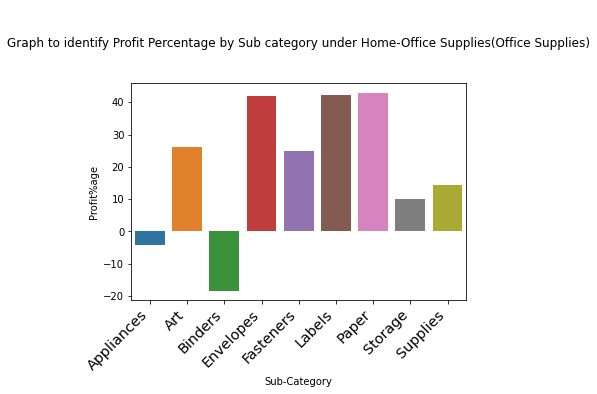

In [22]:
plt.title('\n\nGraph to identify Profit Percentage by Sub category under Home-Office Supplies(Office Supplies)\n\n')
sns.barplot(data=df_avg_superstore_home_office_office_suplies,y=df_avg_superstore_home_office_office_suplies['Profit%age'],x=df_avg_superstore_home_office_office_suplies['Sub-Category'])
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,5))

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

We can see Envelopes,Labels and Paper are major Profit percentage contributors.

In [32]:
avg_profit=superstore_consumer.groupby('Category')['Profit%age'].mean()
df_avg_profit_by_Category=pd.DataFrame(avg_profit)
print(df_avg_profit_by_Category)


                 Profit%age
Category                   
Furniture          3.037962
Office Supplies   12.876053
Technology        15.268389


In [33]:
#  sns.displot(np.superstore['Segment'],x=''hue=superstore['Category'])
# consumer_profit%age=np.mean[superstore['Segement']
for i in superstore['Segment'].unique():
  print(i+'_Avg_Profit%age :: {} \n\n'.format(np.mean(superstore[superstore['Segment']==i]['Profit%age'])))                       
# np.mean(superstore[superstore['Segment']=='Consumer']['Profit%age'])
# corporate_profit%age
# HomeOffice_profit%age

Consumer_Avg_Profit%age :: 11.204952133156496 


Corporate_Avg_Profit%age :: 12.120260868746454 


Home Office_Avg_Profit%age :: 14.286958506103376 




In [37]:
superstore.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit%age
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,16.0
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,30.0


Lets check Profit%age by Sub category 

In [41]:
avg_profit_SubCategory=superstore.groupby('Sub-Category')['Profit%age'].mean()
df_avg_profit_SubCategory=pd.DataFrame(avg_profit_SubCategory)
df_avg_profit_SubCategory=df_avg_profit_SubCategory.reset_index()
df_avg_profit_SubCategory.columns


Index(['Sub-Category', 'Profit%age'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

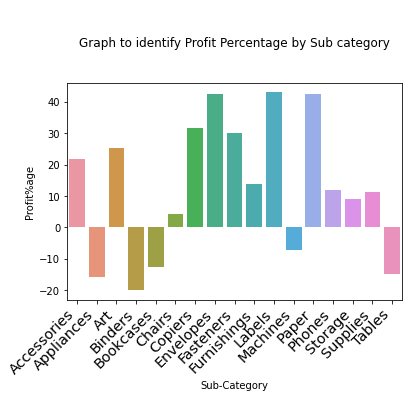

In [42]:
plt.title('\n\nGraph to identify Profit Percentage by Sub category\n\n')
sns.barplot(data=df_avg_profit_SubCategory,x=df_avg_profit_SubCategory['Sub-Category'],y=df_avg_profit_SubCategory['Profit%age'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [23]:
avg_discount_SubCategory=superstore.groupby('Sub-Category')['Discount'].mean()
df_avg_discount_SubCategory=pd.DataFrame(avg_discount_SubCategory)
df_avg_discount_SubCategory=df_avg_discount_SubCategory.reset_index()
df_avg_discount_SubCategory.columns


Index(['Sub-Category', 'Discount'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

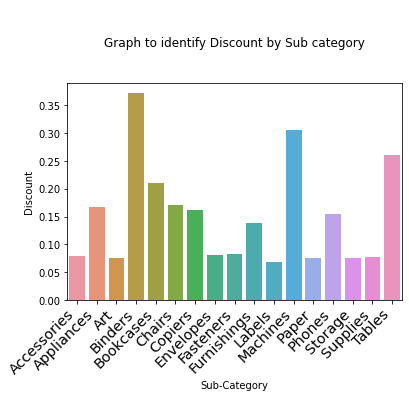

In [24]:
plt.title('\n\nGraph to identify Discount by Sub category\n\n')
sns.barplot(data=df_avg_discount_SubCategory,x=df_avg_discount_SubCategory['Sub-Category'],y=df_avg_discount_SubCategory['Discount'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

We can notice that Appliances,Binders,Bookcases and Tables contribute maximum to Losses despite having discounted prices . 

Lets identify the counts of these Loss contributing items

In [25]:
superstore_loss_making_items= superstore[(superstore['Sub-Category']=='Appliances')| (superstore['Sub-Category']=='Binders')| (superstore['Sub-Category']=='Bookcases')| (superstore['Sub-Category']=='Tables')]
superstore_loss_making_items.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit%age
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.0
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

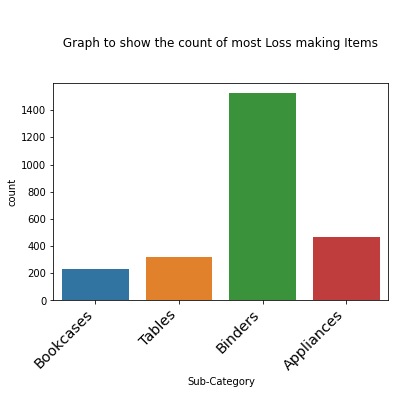

In [65]:
"""
plt.title('\n\n Graph to show the count of most Loss making Items \n\n')
sns.countplot(superstore_loss_making_items['Sub-Category'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

"""

In [26]:
superstore_loss_making_items_new=superstore_loss_making_items[[
       'Postal Code',  'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit%age']]

superstore_loss_making_items_new.head(2)

,Postal Code,Sales,Quantity,Discount,Profit,Profit%age
0,42420,261.9600,2,0.00,41.9136,16.0
3,33311,957.5775,5,0.45,-383.0310,-40.0


In [89]:
superstore_loss_making_items_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2536 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Postal Code  2536 non-null   int64  
 1   Sales        2536 non-null   float64
 2   Quantity     2536 non-null   int64  
 3   Discount     2536 non-null   float64
 4   Profit       2536 non-null   float64
 5   Profit%age   2536 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 218.7 KB


In [27]:
df_s=superstore_loss_making_items_new

In [92]:
df_s.sort_values(by=['Profit%age'], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_s.head(2)

,Postal Code,Sales,Quantity,Discount,Profit,Profit%age
0,42420,261.9600,2,0.00,41.9136,16.0
3,33311,957.5775,5,0.45,-383.0310,-40.0


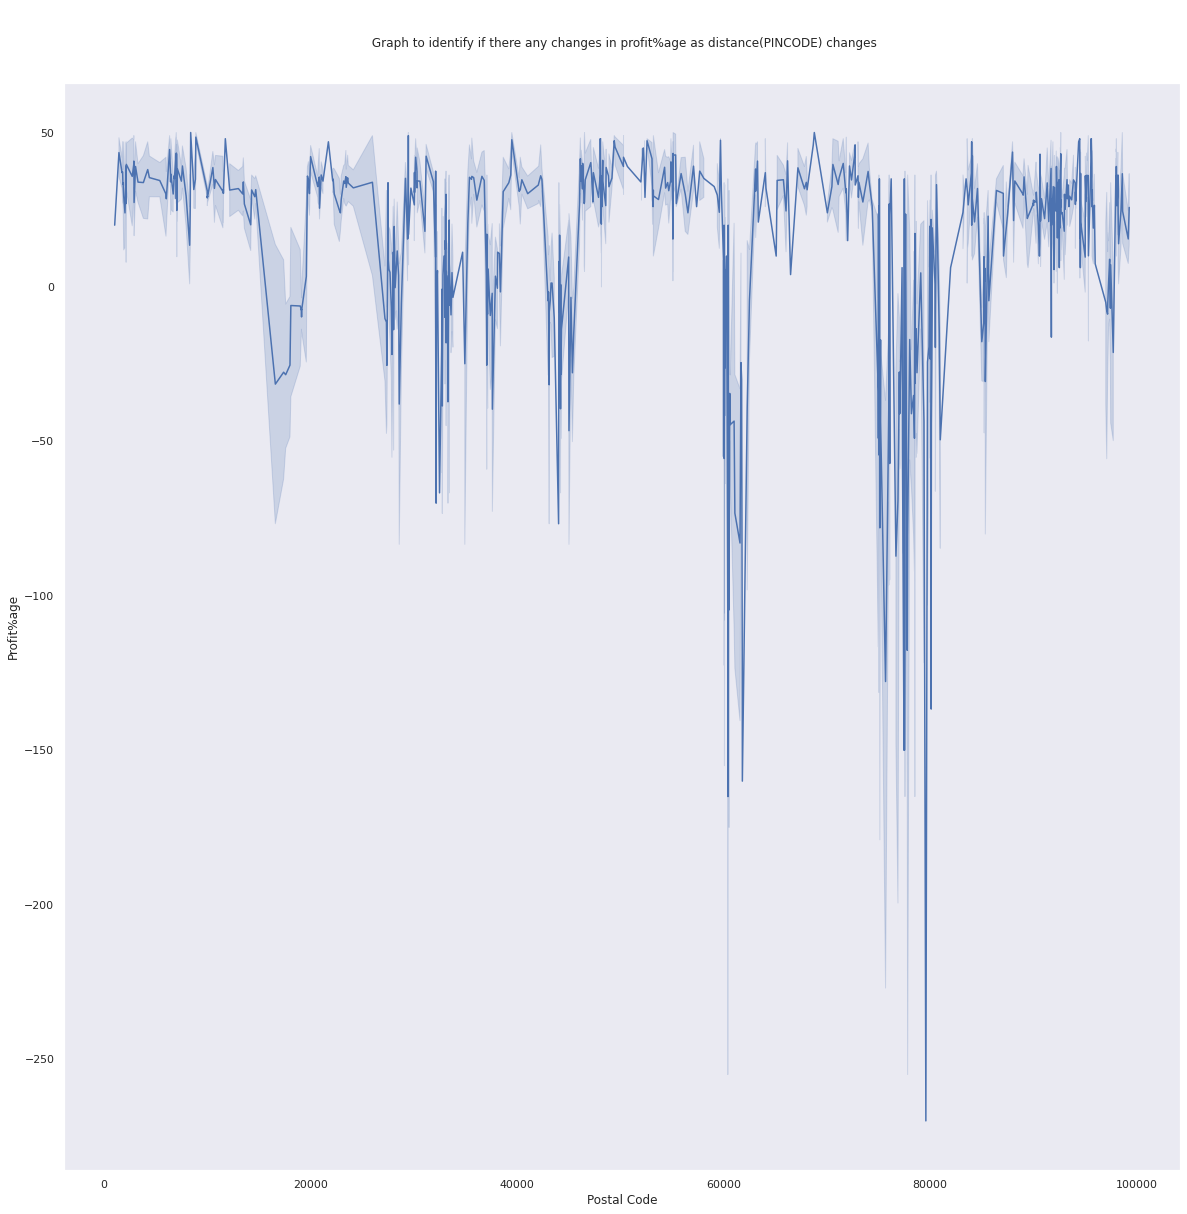

In [34]:
plt.figure(figsize=(20,20))
sns.lineplot(x='Postal Code',y='Profit%age',data=superstore,palette = "Set1")
sns.set(style='dark')
plt.title('\n\n Graph to identify if there any changes in profit%age as distance(PINCODE) changes\n\n')
plt.show()

In [170]:
superstore_loss_making_items.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit%age'],
      dtype='object')

In [176]:
ss=superstore_loss_making_items.sort_values(by='Profit%age')

In [177]:
ss.drop(['Row ID', 'Order ID','Order Date', 'Ship Date','Profit','Segment','Product ID','Customer ID','City','Region' ], axis=1,inplace=True)


In [36]:
# ss.head(50)[['Category','Sub-Category','Discount','Profit%age']]
superstore[['Category','Sub-Category','Discount','Profit%age']].sort_values(by='Profit%age',ascending=False).head(40)

,Category,Sub-Category,Discount,Profit%age
871,Office Supplies,Paper,0.0,50.0
5634,Office Supplies,Binders,0.0,50.0
2291,Furniture,Furnishings,0.0,50.0
2300,Office Supplies,Binders,0.0,50.0
764,Office Supplies,Envelopes,0.0,50.0
5592,Office Supplies,Binders,0.0,50.0
770,Office Supplies,Binders,0.0,50.0
2317,Office Supplies,Binders,0.0,50.0
2323,Office Supplies,Binders,0.0,50.0
7349,Office Supplies,Binders,0.0,50.0


In [37]:
# ss.tail(50)[['Category','Sub-Category','Discount','Profit%age']]

superstore[['Category','Sub-Category','Discount','Profit%age']].sort_values(by='Profit%age',ascending=True).head(20)

,Category,Sub-Category,Discount,Profit%age
676,Office Supplies,Appliances,0.8,-275.0
8766,Office Supplies,Appliances,0.8,-275.0
9164,Office Supplies,Appliances,0.8,-275.0
261,Office Supplies,Appliances,0.8,-275.0
5414,Office Supplies,Appliances,0.8,-270.0
6561,Office Supplies,Appliances,0.8,-270.0
6989,Office Supplies,Appliances,0.8,-270.0
4980,Office Supplies,Appliances,0.8,-270.0
9086,Office Supplies,Appliances,0.8,-270.0
8916,Office Supplies,Appliances,0.8,-270.0


We can notice that the Office Supplies(Binders) are reaping huge profit percentages with no discount.
On the other hand we can notice that the Office Supplies(Appliances) are making huge losses despite the 80% discount. 
So to reduce the losses we need to cut back on the discount percentage of these loss making items and offer some discount on profit making Office Supplies(Binders) to promote sales. 

In [ ]:
# ss.head(100) 
# Binders are making major profits and major losses.

In [41]:
ss1=superstore[superstore['Sub-Category']=='Binders'][['Category','Sub-Category','Postal Code','Product Name','Discount','Profit%age']]

In [45]:
ss1[(ss1['Product Name']=='Avery Non-Stick Binders')|(ss1['Product Name']=='Storex Dura Pro Binders')].sort_values(by='Profit%age',ascending=False)

,Category,Sub-Category,Postal Code,Product Name,Discount,Profit%age
6268,Office Supplies,Binders,2138,Avery Non-Stick Binders,0.0,46.000000
5386,Office Supplies,Binders,72756,Avery Non-Stick Binders,0.0,46.000000
2531,Office Supplies,Binders,72209,Avery Non-Stick Binders,0.0,46.000000
9494,Office Supplies,Binders,74012,Storex Dura Pro Binders,0.0,45.000000
8595,Office Supplies,Binders,22204,Storex Dura Pro Binders,0.0,45.000000
1439,Office Supplies,Binders,2908,Storex Dura Pro Binders,0.0,45.000000
6333,Office Supplies,Binders,48185,Storex Dura Pro Binders,0.0,45.000000
572,Office Supplies,Binders,10024,Storex Dura Pro Binders,0.2,33.750000
3024,Office Supplies,Binders,10011,Storex Dura Pro Binders,0.2,33.750000
334,Office Supplies,Binders,90045,Storex Dura Pro Binders,0.2,33.750000


Apparently seems like the more discount is offered on 'Avery Non-Stick Binders' and 'Storex Dura Pro Binders' , the more loss its making. Thence discount from these products should be waived off.

In [47]:
# ss_loss['Product Name']=ss_loss['Product Name'].str.split(" ", n = 1, expand = True) 
# # new data frame with split value columns 
# # data["Team"]= data["Team"].str.split("t", n = 1, expand = True) 
# ss_loss.sort_values(by='Product Name').head(30)
# ss_loss[ss_loss['Product Name']=='Acco']

new=superstore['Product Name'].str.split(" ",n=1,expand=True)
new.head(2) 

# new = data["Name"].str.split(" ", n = 1, expand = True) 
  
# # making separate first name column from new data frame 
# data["First Name"]= new[0] 
  
# # making separate last name column from new data frame 
# data["Last Name"]= new[1] 

,0,1
0,Bush,Somerset Collection Bookcase
1,Hon,"Deluxe Fabric Upholstered Stacking Chairs, Rou..."


In [77]:
superstore['Product Company Name']=new[0]
print ('\n Below listed items are the least profit making \n\n')
superstore.sort_values(by='Profit%age')[['Product Company Name','Product Name','Discount','Profit%age']].head(10)


 Below listed items are the least profit making 




,Product Company Name,Product Name,Discount,Profit%age
676,Hoover,Hoover Portapower Portable Vacuum,0.8,-275.0
8766,Kensington,Kensington 6 Outlet SmartSocket Surge Protector,0.8,-275.0
9164,Hoover,Hoover Shoulder Vac Commercial Portable Vacuum,0.8,-275.0
261,Eureka,Eureka Disposable Bags for Sanitaire Vibra Gro...,0.8,-275.0
5414,Euro,Euro Pro Shark Stick Mini Vacuum,0.8,-270.0
6561,Fellowes,Fellowes 8 Outlet Superior Workstation Surge P...,0.8,-270.0
6989,Hoover,Hoover Commercial Lightweight Upright Vacuum,0.8,-270.0
4980,Belkin,Belkin 6 Outlet Metallic Surge Strip,0.8,-270.0
9086,Hoover,Hoover Commercial Lightweight Upright Vacuum w...,0.8,-270.0
8916,Euro,Euro Pro Shark Stick Mini Vacuum,0.8,-270.0


In [90]:
print('\n\n Below List of companies are achieving huge profits for the superstore\n\n')
superstore_groupby_company = superstore.groupby(by='Product Company Name')[['Product Company Name','Profit%age']].mean()
superstore_groupby_company[superstore_groupby_company['Profit%age']>45]



 Below List of companies are achieving huge profits for the superstore




,Profit%age
Product Company Name,
Alphabetical,45.833333
Brown,47.500000
Color-Coded,49.000000
Dot,45.812500
Logitech Illuminated,45.833333
Loose,47.000000
Memo,45.833333
Multicolor,45.400000
Multimedia,46.000000


In [105]:
print('\n\n Below List of companies are achieving least profits for the superstore\n------------------------------------------------------------------------\n')
superstore_groupby_company[superstore_groupby_company['Profit%age']<-60]



 Below List of companies are achieving least profits for the superstore
------------------------------------------------------------------------



,Profit%age
Product Company Name,
3.6,-148.400000
BoxOffice,-68.727273
Catalog,-61.562500
Cubify,-83.458333
Euro,-177.500000
Insertable,-77.685897
UniKeep,-68.300000
